<a href="https://colab.research.google.com/github/Dzikrifaza/FreshGrocie/blob/ml_dev/FreshGrocie_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
!pip install opendatasets
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import Sequence

import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import splitfolders 
import pandas as pd
import os

import shutil
from PIL import Image

#Download Dataset

In [ ]:
od.download("https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dianaayum151dsy1844
Your Kaggle Key: ··········


100%|██████████| 870M/870M [00:36<00:00, 24.8MB/s]


# Split Data

In [ ]:
splitfolders.ratio('/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset(12000)/Fruits', 
                   output="/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Fruits/", 
                   seed=42, 
                   ratio=(0.8,0.1,0.1), # training, val, test
                   group_prefix=None)

Copying files: 5997 files [00:01, 4373.38 files/s]


In [ ]:
splitfolders.ratio('/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset(12000)/Vegetables', 
                   output="/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Vegetables", 
                   seed=42, 
                   ratio=(0.8,0.1,0.1), # training, val, test
                   group_prefix=None)

Copying files: 6003 files [00:02, 2821.32 files/s]


#Merge Train and Test Data for Fruits and Vegetables 

Funtion for moving the directory

In [ ]:
def move_dir(src, dest, dir_list):
  for dir_ in dir_list:
    source = os.path.join(src, dir_)

    if os.path.isdir(source):
        shutil.move(source, dest)

In [ ]:
def move_subdir(source, dest, subdir):
  if not os.path.isdir(dest):
      os.mkdir(dest)

  src_path = os.path.join(source, subdir)
  for item_list in os.listdir(src_path):
      src = os.path.join(src_path, item_list)
      dst = os.path.join(dest, item_list)
      shutil.move(src, dst)

  os.rmdir(src_path)

Train Data:

Taking the data from fruits and vegetables and combine them into 1 training data

In [ ]:
source_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Fruits'

dir_list = ['train']

dest_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset'
dest = os.path.join(dest_path, 'train')

move_dir(source_path, dest, dir_list)

In [ ]:
source_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Vegetables'

subdir = 'train'

dest_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/train'

move_subdir(source_path, dest_path, subdir)

Validation Data:

Taking the data from fruits and vegetables and combine them into 1 validation data

In [ ]:
source_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Fruits'

dir_list = ['val']

dest_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset'
dest = os.path.join(dest_path, 'val')

move_dir(source_path, dest, dir_list)

In [ ]:
source_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Vegetables'

subdir = 'val'

dest_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/val'

move_subdir(source_path, dest_path, subdir)

Test Data:

Taking the data from fruits and vegetables and combine them into 1 testing data

In [ ]:
source_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Fruits'
 
dir_list = ['test']
 
dest_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset'
dest = os.path.join(dest_path, 'test')

move_dir(source_path, dest, dir_list)

In [ ]:
source_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/Vegetables'

subdir = 'test'

dest_path = '/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/test'

move_subdir(source_path, dest_path, subdir)

#Assign

In [ ]:
train_FileNames = os.path.join('/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/train')
val_FileNames = os.path.join('/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/val')
test_FileNames = os.path.join('/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset/test')

Convert the RGBA

In [ ]:
directory = "/content/fruits-and-vegetables-dataset/Fruits_Vegetables_Dataset"

for root, _, files in os.walk(directory):
    for file in files:
        if file.endswith(".png") or file.endswith(".webp"):
            image_path = os.path.join(root, file)

            with Image.open(image_path) as img:
                if img.mode == "P" and "transparency" in img.info:
                    img = img.convert("RGBA")

                save_path = os.path.splitext(image_path)[0] + ".png"
                if file.endswith(".webp"):
                    save_path = os.path.splitext(image_path)[0] + ".jpg"

                img.save(save_path)

#Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-28 08:41:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  26.4MB/s    in 3.2s    

2023-05-28 08:41:45 (26.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained(local_weights_file):
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None,
                                  pooling ='max',
                                  classes = 20) 

  pre_trained_model.load_weights(local_weights_file)

  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained(local_weights_file)

In [ ]:
def output_of_last_layer(pre_trained_model):
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  last_output = last_desired_layer.output

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

def create_final_model(pre_trained_model, last_output):
  x = layers.Flatten()(last_output)
  x = layers.Dense(216, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(20, activation='softmax')(x)        

  model = Model(inputs=pre_trained_model.input, outputs=x)

  return model

In [ ]:
model = create_final_model(pre_trained_model, last_output)

#Normalization

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range=(0.2, 0.8),
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_FileNames,  
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_FileNames,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 9582 images belonging to 20 classes.
Found 1192 images belonging to 20 classes.


#Adjust Learning Training

In [ ]:
def adjust_learning_rate():    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, 
                  metrics=["accuracy"]) 
    
    history = model.fit(train_generator, epochs=100, callbacks=[lr_schedule])
    
    return history

In [ ]:
lr_history = adjust_learning_rate()

Epoch 1/100
480/480 [==============================] - 125s 236ms/step - loss: 3.1251 - accuracy: 0.0494 - lr: 1.0000e-06
Epoch 2/100
480/480 [==============================] - 114s 237ms/step - loss: 3.0810 - accuracy: 0.0533 - lr: 1.1220e-06
Epoch 3/100
480/480 [==============================] - 113s 236ms/step - loss: 3.0538 - accuracy: 0.0535 - lr: 1.2589e-06
Epoch 4/100
480/480 [==============================] - 119s 248ms/step - loss: 3.0247 - accuracy: 0.0620 - lr: 1.4125e-06
Epoch 5/100
480/480 [==============================] - 114s 237ms/step - loss: 2.9855 - accuracy: 0.0742 - lr: 1.5849e-06
Epoch 6/100
480/480 [==============================] - 113s 236ms/step - loss: 2.9615 - accuracy: 0.0810 - lr: 1.7783e-06
Epoch 7/100
480/480 [==============================] - 113s 235ms/step - loss: 2.9281 - accuracy: 0.0964 - lr: 1.9953e-06
Epoch 8/100
480/480 [==============================] - 114s 237ms/step - loss: 2.8945 - accuracy: 0.1121 - lr: 2.2387e-06
Epoch 9/100
480/480 [===

(1e-06, 10.0, 0.0, 10.0)

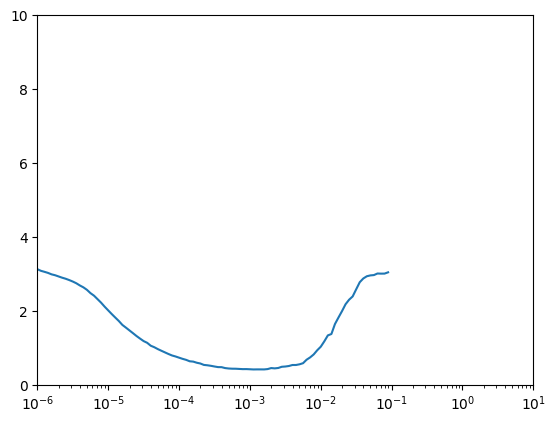

In [ ]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-6, 10, 0, 10])

#Compile and Train the model

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=3.5481e-04, momentum=0.9),
                metrics=['accuracy'])

In [ ]:
# Constant for epochs
# Train the model
inception_v3 = model.fit(
    train_generator,
    batch_size = 20,
    steps_per_epoch = 400,  # 9582 images = batch_size * steps 
    epochs= 10,
    validation_data=validation_generator,
    validation_steps=50,  # 2408 images = batch_size * steps
    verbose=2)

Epoch 1/10
400/400 - 113s - loss: 1.4543 - accuracy: 0.5418 - val_loss: 0.6458 - val_accuracy: 0.7720 - 113s/epoch - 283ms/step
Epoch 2/10
400/400 - 98s - loss: 0.8467 - accuracy: 0.7273 - val_loss: 0.5561 - val_accuracy: 0.8210 - 98s/epoch - 245ms/step
Epoch 3/10
400/400 - 93s - loss: 0.7244 - accuracy: 0.7575 - val_loss: 0.4796 - val_accuracy: 0.8550 - 93s/epoch - 232ms/step
Epoch 4/10
400/400 - 94s - loss: 0.6523 - accuracy: 0.7869 - val_loss: 0.4156 - val_accuracy: 0.8660 - 94s/epoch - 236ms/step
Epoch 5/10
400/400 - 92s - loss: 0.5899 - accuracy: 0.8074 - val_loss: 0.4127 - val_accuracy: 0.8560 - 92s/epoch - 231ms/step
Epoch 6/10
400/400 - 98s - loss: 0.5569 - accuracy: 0.8162 - val_loss: 0.3694 - val_accuracy: 0.8780 - 98s/epoch - 244ms/step
Epoch 7/10
400/400 - 93s - loss: 0.5346 - accuracy: 0.8216 - val_loss: 0.3380 - val_accuracy: 0.8800 - 93s/epoch - 233ms/step
Epoch 8/10
400/400 - 94s - loss: 0.5133 - accuracy: 0.8300 - val_loss: 0.3355 - val_accuracy: 0.8840 - 94s/epoch - 2